In [124]:
import warnings

warnings.filterwarnings('ignore')

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [126]:
bike=pd.read_csv("D:/ML/day.csv",index_col=0)

In [127]:
bike

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


In [128]:
bike.isna().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [129]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 88.4+ KB


In [130]:
#Changing season column numeric values to string
bike['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [131]:
bike.loc[(bike['season']==1),'season']='spring'

In [132]:
bike['season'].unique()

array(['spring', 2, 3, 4], dtype=object)

In [133]:
bike.loc[(bike['season']==2),'season']='summer'

In [134]:
bike['season'].unique()

array(['spring', 'summer', 3, 4], dtype=object)

In [135]:
bike.loc[(bike['season']==3),'season']='fall'

In [136]:
bike['season'].unique()

array(['spring', 'summer', 'fall', 4], dtype=object)

In [137]:
bike.loc[(bike['season']==4),'season']='winter'

In [138]:
bike['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [139]:
bike['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [140]:
bike['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [141]:
def object_map(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [142]:
bike[['mnth']]=bike[['mnth']].apply(object_map)

In [143]:
bike[['mnth']].value_counts()

mnth
Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sep     60
Feb     56
dtype: int64

In [144]:
bike['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [145]:
bike['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [146]:
def str_map(x):
    return x.map({1:'Wed',2:'Thu',3:'Fri',4:'Sat',5:'Sun',6:'Mon',0:'Tue'})

In [147]:
bike[['weekday']]=bike[['weekday']].apply(str_map)

In [148]:
bike[['weekday']].value_counts()

weekday
Mon        105
Tue        105
Wed        105
Sat        104
Sun        104
Thu        104
Fri        103
dtype: int64

In [149]:
bike['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [150]:
bike['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [151]:
bike.loc[(bike['weathersit']==1),'weathersit']='A'
bike.loc[(bike['weathersit']==2),'weathersit']='B'
bike.loc[(bike['weathersit']==3),'weathersit']='C'
bike.loc[(bike['weathersit']==4),'weathersit']='D'

In [152]:
bike['weathersit'].value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [153]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 77.0+ KB


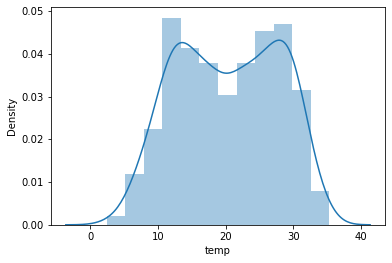

In [154]:
_=sns.distplot(bike['temp'])

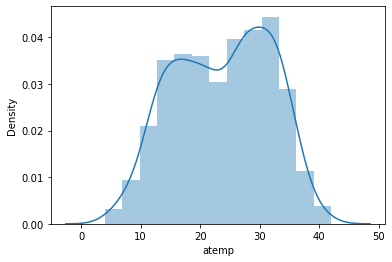

In [155]:
_=sns.distplot(bike['atemp'])

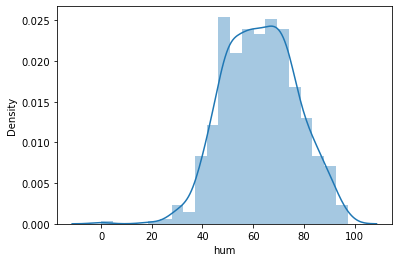

In [156]:
_=sns.distplot(bike['hum'])

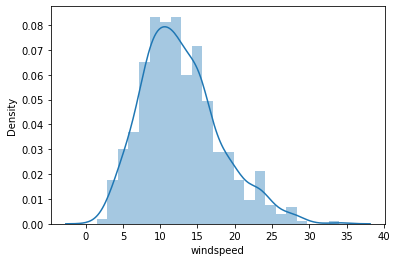

In [157]:
_=sns.distplot(bike['windspeed'])

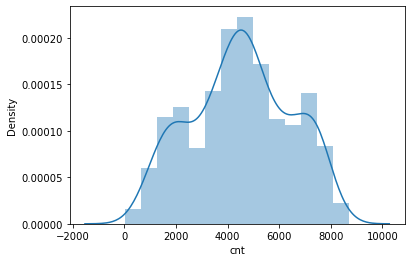

In [158]:
_=sns.distplot(bike['cnt'])

In [159]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    object 
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    object 
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    object 
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    object 
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 77.0+ KB


In [160]:
bike['dteday']=pd.to_datetime(bike['dteday'])

In [161]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 79.8+ 

In [162]:
bike_categorical=bike.select_dtypes('object')

In [163]:
bike_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   mnth        730 non-null    object
 2   weekday     730 non-null    object
 3   weathersit  730 non-null    object
dtypes: object(4)
memory usage: 17.1+ KB


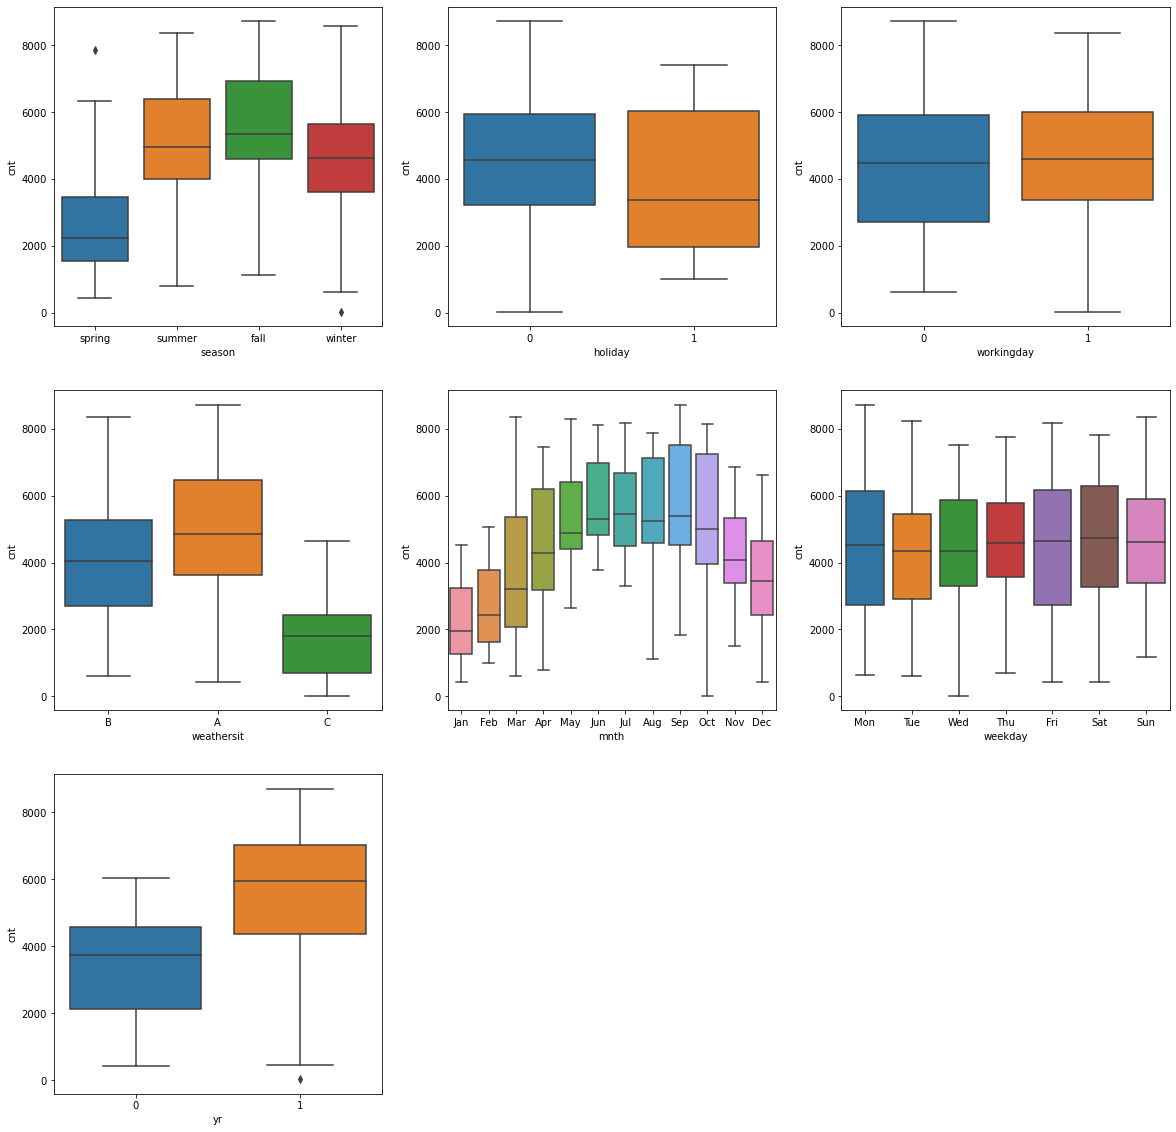

In [164]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x=bike['season'],y=bike['cnt'])
plt.subplot(3,3,2)
sns.boxplot(x=bike['holiday'],y=bike['cnt'])
plt.subplot(3,3,3)
sns.boxplot(x=bike['workingday'],y=bike['cnt'])
plt.subplot(3,3,4)
sns.boxplot(x=bike['weathersit'],y=bike['cnt'])
plt.subplot(3,3,5)
sns.boxplot(x=bike['mnth'],y=bike['cnt'])
plt.subplot(3,3,6)
sns.boxplot(x=bike['weekday'],y=bike['cnt'])
plt.subplot(3,3,7)
sns.boxplot(x=bike['yr'],y=bike['cnt'])

plt.show()

In [165]:
bike_numeric=bike.select_dtypes(include=['float64','int64'])

In [166]:
bike_numeric.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [167]:
bike_numeric=bike_numeric.drop(['yr', 'holiday', 'workingday'],axis=1)

In [168]:
bike_numeric.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

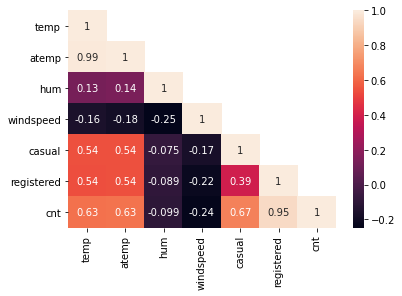

In [169]:
mask=np.array(bike_numeric.corr())
mask[np.tril_indices_from(mask)]=False
sns.heatmap(bike_numeric.corr(),mask=mask,annot=True,)
plt.show

In [170]:
bike.drop(['atemp'],axis=1,inplace=True)

In [171]:
bike_numeric.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [172]:
bike_categorical

,season,mnth,weekday,weathersit
instant,,,,
1,spring,Jan,Mon,B
2,spring,Jan,Tue,B
3,spring,Jan,Wed,A
4,spring,Jan,Thu,A
5,spring,Jan,Fri,A
...,...,...,...,...
726,spring,Dec,Sat,B
727,spring,Dec,Sun,B
728,spring,Dec,Mon,B


In [173]:
bike_dummies=pd.get_dummies(bike_categorical,drop_first=True)

In [174]:
bike_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
bike=bike.drop(list(bike_categorical.columns),axis=1)

In [176]:
bike=pd.concat([bike,bike_dummies],axis=1)

In [177]:
bike.head()

,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,1,0
2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,1,0,1,0
3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,1,0,0
4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,1,0,0,0,0
5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,0,0,0


In [178]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dteday         730 non-null    datetime64[ns]
 1   yr             730 non-null    int64         
 2   holiday        730 non-null    int64         
 3   workingday     730 non-null    int64         
 4   temp           730 non-null    float64       
 5   hum            730 non-null    float64       
 6   windspeed      730 non-null    float64       
 7   casual         730 non-null    int64         
 8   registered     730 non-null    int64         
 9   cnt            730 non-null    int64         
 10  season_spring  730 non-null    uint8         
 11  season_summer  730 non-null    uint8         
 12  season_winter  730 non-null    uint8         
 13  mnth_Aug       730 non-null    uint8         
 14  mnth_Dec       730 non-null    uint8         
 15  mnth_Feb       730 non-

In [179]:
bike.drop(['dteday'],axis=1,inplace=True)

In [180]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,80.5833,10.749882,331,654,985,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,14.902598,69.6087,16.652113,131,670,801,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.050924,43.7273,16.636703,120,1229,1349,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,8.200000,59.0435,10.739832,108,1454,1562,1,...,0,0,0,0,0,1,0,0,0,0
5,0,0,1,9.305237,43.6957,12.522300,82,1518,1600,1,...,0,0,0,0,0,0,0,0,0,0


# Model Building

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor

In [182]:
X=bike.drop(['cnt'],axis=1)
y=bike['cnt']

In [185]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'casual',
       'registered', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [183]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [184]:
scaler=MinMaxScaler()

In [186]:
X_train[['temp', 'hum', 'windspeed', 'casual',
       'registered']]=scaler.fit_transform(X_train[['temp', 'hum', 'windspeed', 'casual',
       'registered']])

In [187]:
X_test[['temp', 'hum', 'windspeed', 'casual',
       'registered']]=scaler.transform(X_test[['temp', 'hum', 'windspeed', 'casual',
       'registered']])

In [190]:
model=GradientBoostingRegressor()

In [192]:
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [193]:
model.score(X_test,y_test)

0.9955305586038489

In [194]:
model.score(X_train,y_train)

0.99902233796698